In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()



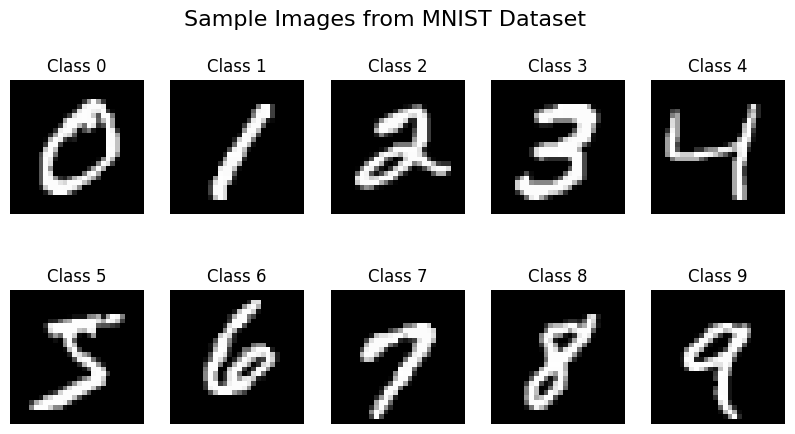

In [ ]:
# Display one image from each class (0-9)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle('Sample Images from MNIST Dataset', fontsize=16)

# Find and display one image per class
for i in range(10):
    ax = axes[i // 5, i % 5]
    idx = (y_train == i).nonzero()[0][0]
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f'Class {i}')
    ax.axis('off')

plt.show()

In [ ]:
# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)



In [ ]:
# Reshape data for the dense network
x_train_dense = x_train.reshape((x_train.shape[0], 28 * 28))
x_test_dense = x_test.reshape((x_test.shape[0], 28 * 28))

In [ ]:
# Model 1: Dense Layer Network

from tensorflow.keras import layers, models
network=models.Sequential()
network.add(layers.Dense(512,activation='relu',name ='layer_1',input_shape=(28*28,)))
network.add(layers.Dense(512,activation='relu',name ='layer_2'))
network.add(layers.Dense(265,activation='relu',name ='layer_3'))
network.add(layers.Dense(128,activation='relu',name ='layer_4'))
network.add(layers.Dense(64,activation='relu',name ='layer_5'))
network.add(layers.Dense(10,activation='softmax'))
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
network.fit(x_train_dense, y_train, epochs=5, batch_size=128, validation_data=(x_test_dense, y_test))


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.8111 - loss: 0.5782 - val_accuracy: 0.9664 - val_loss: 0.1094
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9685 - loss: 0.1066 - val_accuracy: 0.9653 - val_loss: 0.1228
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9803 - loss: 0.0638 - val_accuracy: 0.9725 - val_loss: 0.0974
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9847 - loss: 0.0508 - val_accuracy: 0.9771 - val_loss: 0.0835
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9877 - loss: 0.0385 - val_accuracy: 0.9797 - val_loss: 0.0743


In [ ]:
dense_test_loss, dense_test_acc = network.evaluate(x_test_dense, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9753 - loss: 0.0849


In [ ]:
# Display the model summary
print("\nDense Layer Network Summary:")
network.summary()


Dense Layer Network Summary:


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer_1 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_3 (Dense)                      │ (None, 265)                 │         135,945 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_4 (Dense)                      │ (None, 128)                 │          34,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,686,952 (6.44 MB)

 Trainable params: 843,475 (3.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 843,477 (3.22 MB)

In [ ]:
# Reshape data for the CNN
x_train_cnn = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test_cnn = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [ ]:
from keras import models, layers
# Model 2: Convolutional Neural Network
cnn_model =models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))
# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
print("\nConvolutional Neural Network Summary:")
cnn_model.summary()


Convolutional Neural Network Summary:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model.fit(x_train_cnn, y_train, epochs=5, batch_size=128, validation_data=(x_test_cnn, y_test))


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 109ms/step - accuracy: 0.8148 - loss: 0.5976 - val_accuracy: 0.9824 - val_loss: 0.0546
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 111ms/step - accuracy: 0.9811 - loss: 0.0601 - val_accuracy: 0.9867 - val_loss: 0.0426
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 112ms/step - accuracy: 0.9871 - loss: 0.0393 - val_accuracy: 0.9906 - val_loss: 0.0307
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 111ms/step - accuracy: 0.9899 - loss: 0.0307 - val_accuracy: 0.9873 - val_loss: 0.0372
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 107ms/step - accuracy: 0.9923 - loss: 0.0235 - val_accuracy: 0.9916 - val_loss: 0.0263


In [ ]:
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9882 - loss: 0.0344


In [ ]:

# Print the accuracy of both models
print("\nDense Network Test Accuracy: {:.2f}%".format(dense_test_acc * 100))
print("CNN Test Accuracy: {:.2f}%".format(cnn_test_acc * 100))


Dense Network Test Accuracy: 97.53%
CNN Test Accuracy: 99.02%


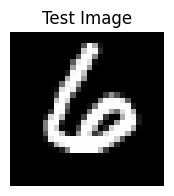

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Actual Label: 6
Predicted Label: 6


In [ ]:
# Test the CNN with a random sample of test data and show the prediction
random_idx = np.random.randint(0, x_test.shape[0])
sample_image = x_test_cnn[random_idx]
sample_label = y_test[random_idx]

# Display the test image
plt.figure(figsize=(2,2 ))
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title('Test Image')
plt.axis('off')
plt.show()

# Make a prediction
predicted_label = np.argmax(cnn_model.predict(np.expand_dims(sample_image, axis=0)), axis=-1)

# Show the predicted class
print(f"Actual Label: {np.argmax(sample_label)}")
print(f"Predicted Label: {predicted_label[0]}")